<a href="https://colab.research.google.com/github/hmgu-itg/VolosSummerSchool/blob/master/VSS_2023/4_Workshop_Meta_Analysis/4_Workshop_Meta_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workshop: Meta-analysis

## Objectives

In this workshop, you will learn how to:
- Access published summary statistics
- Follow-up GWAS hits to obtain evidence of replication 
- Synthesize results using meta-analysis to obtain overall evidence of association

## Why do we need this?

- Reduces false-positive findings: validate genetic risk loci identified by your study and ensure reproducibility of results in independent datasets.

- Increases power: Genetic effects due to common alleles are small, and detection of signals requires large sample sizes. 

- It is feasible: Larger samples have become available and researchers have recognised the value of collaborating to combine resources. 

- It can be readily available: The techniques developed for meta-analysis can use summary data, diminishing the limitations that are imposed by restrictions on sharing individual-level data. 

## Publically available resources

### The European Genome-phenome Archive - [EGA](https://www.ebi.ac.uk/ega/home) 


- A permanent archive that promotes the distribution and sharing of genetic and phenotypic data consented for specific approved uses. 
- Includes major reference data collections for human genetics research, such as the Wellcome Trust Case Control Consortium and the UK10K project.
- Studies and datasets can be browsed on the public website at the European Bioinformatics Institute (EBI).
- Each study is assigned a stable accession that may be referenced in publications.
- Controlled access policy via the Data Access Committee (DAC). 
- Each dataset is covered by a Data Access Agreement (DAA), which defines the terms and conditions of use for the specified dataset. 
- An EGA account is created by the DAC for an individual user, in response to a successful application.
- Datasets are downloaded using the EGA Download Client, which provides instant access to all approved files.


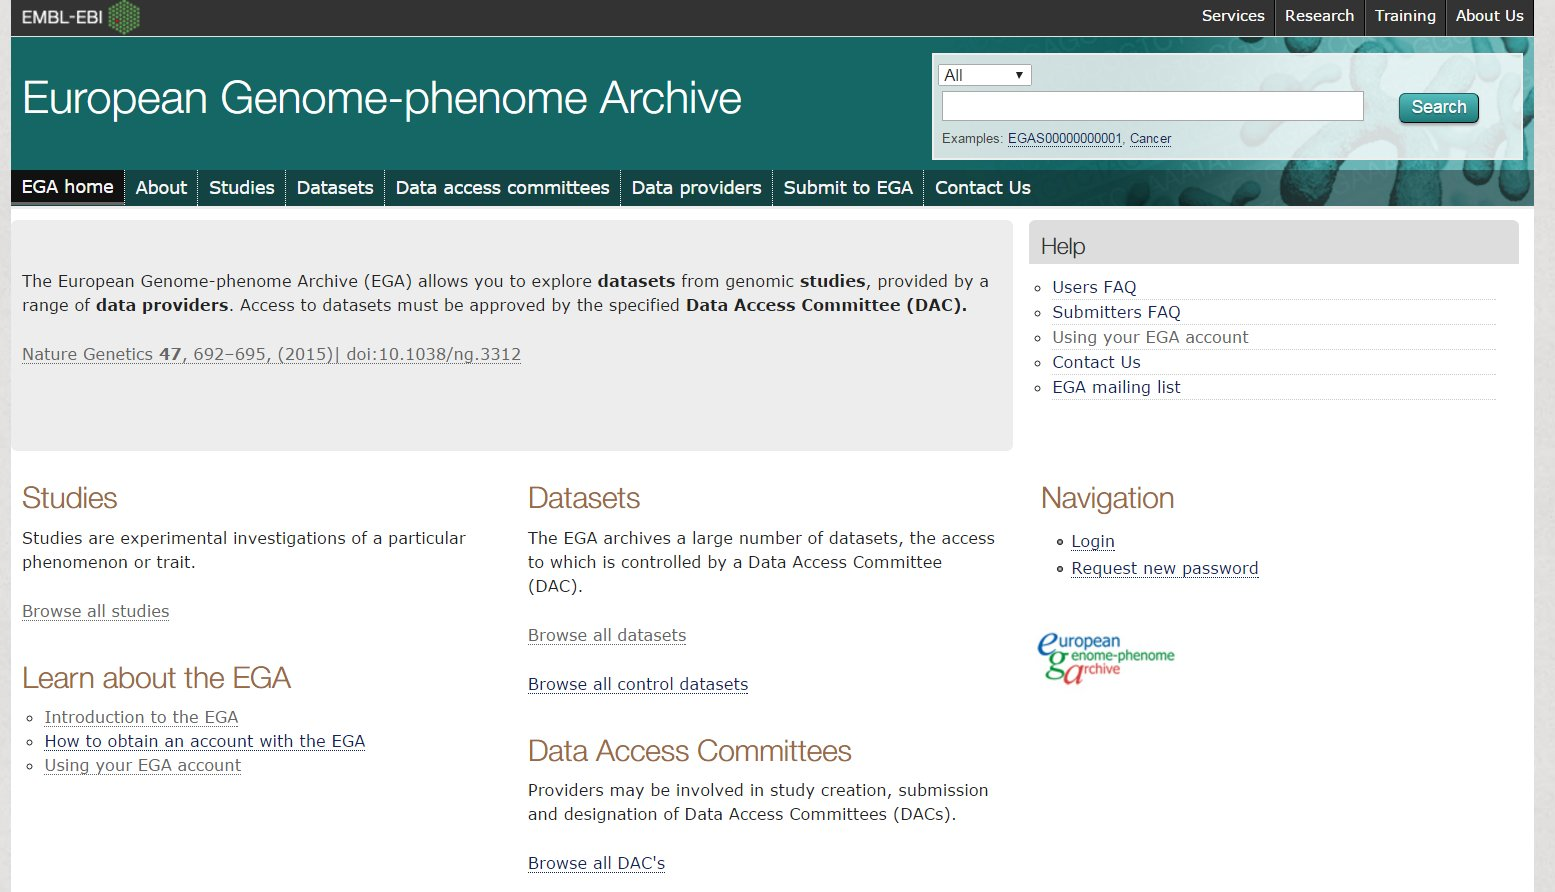

_____


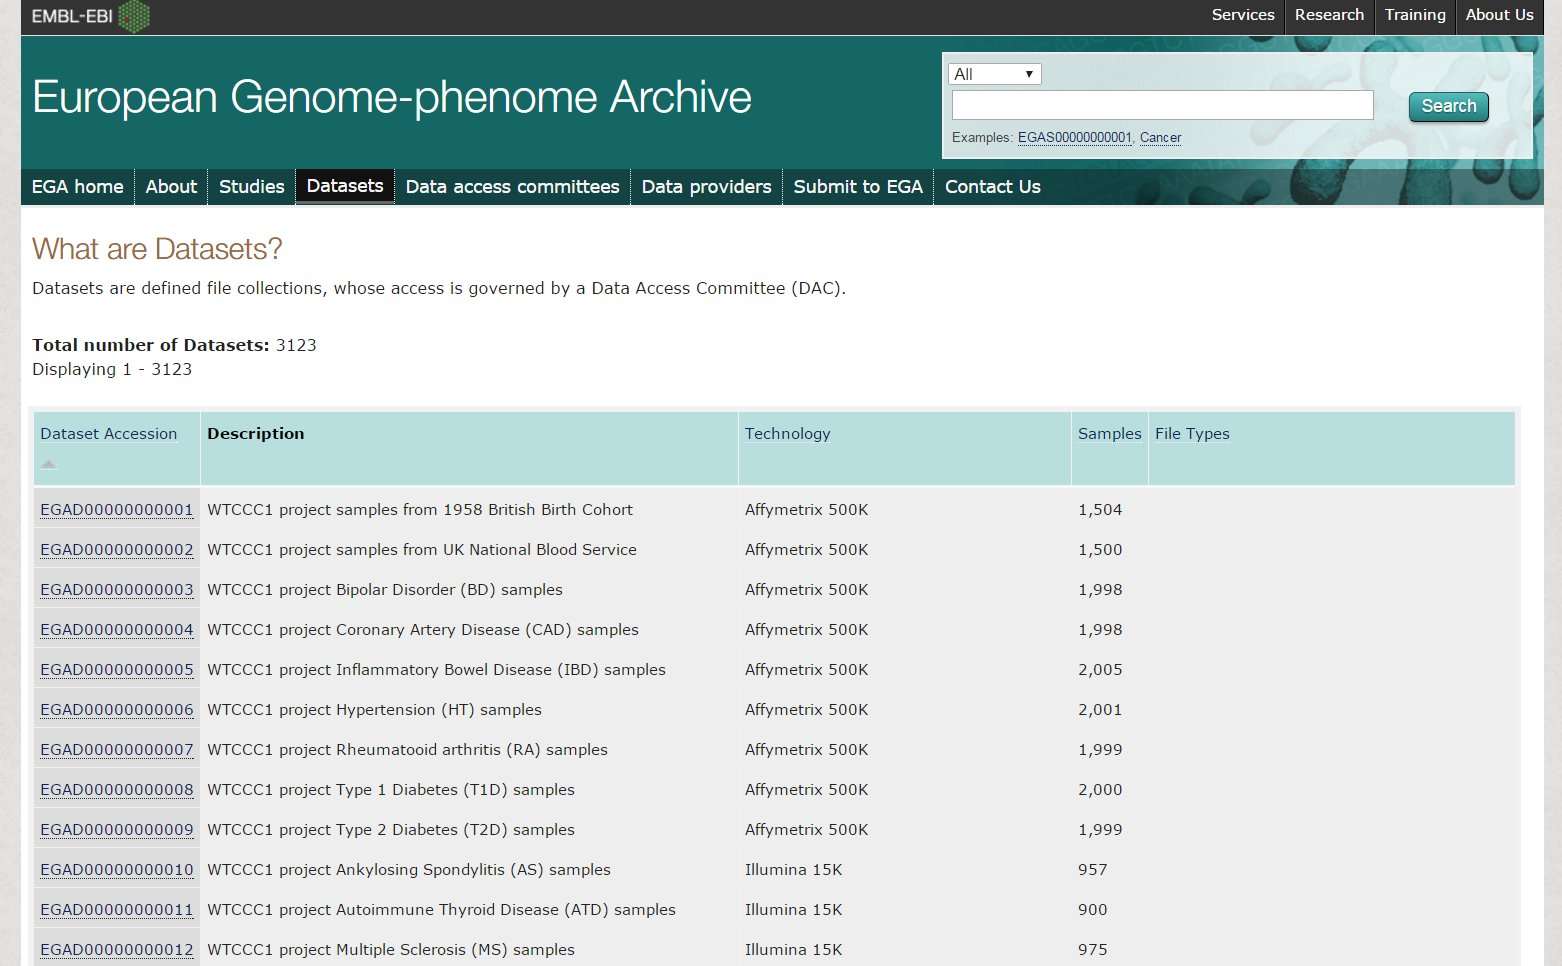


### The database of Genotypes and Phenotypes (dbGaP) 
https://www.ncbi.nlm.nih.gov/gap

- Developed to archive and distribute the data and results from studies that have investigated the interaction of genotype and phenotype in humans.
- Studies and datasets can be browsed on the public website at the National Center for Biotechnology Information (NCBI).
- Controlled access via a management portal for individual-level data, which can be used to submit a data access request, manage access requests, and download approved data sets.

dbgap.png


### [UK Biobank](http://www.ukbiobank.ac.uk/)


- Major health resource with the aim of improving the prevention, diagnosis and treatment of a wide range of illnesses, including cancer, heart diseases, stroke, diabetes, arthritis, osteoporosis, eye disorders, depression and forms of dementia. 
- 500,000 people recruited aged between 40-69 years in 2006-2010 from across the UK. 
- Participants provided measures, blood, urine and saliva samples, detailed information (diet, cognitive function, work history, digestive health) and agreed to have their health followed. 
- Linking to a wide range of electronic health records (cancer, death, hospital episodes, general practice). 
- Currently genotyping and imputation data available for all participants.
- GSK & Regeneron have successfully applied to exome sequence the samples. 
- Wellcome Sanger Institute have successfully appplied to whole genome sequencing of 50,000 samples. =O 
- UK Biobank is open to bona fide researchers anywhere in the world, including those funded by academia and industry.


ukbb1.png

______

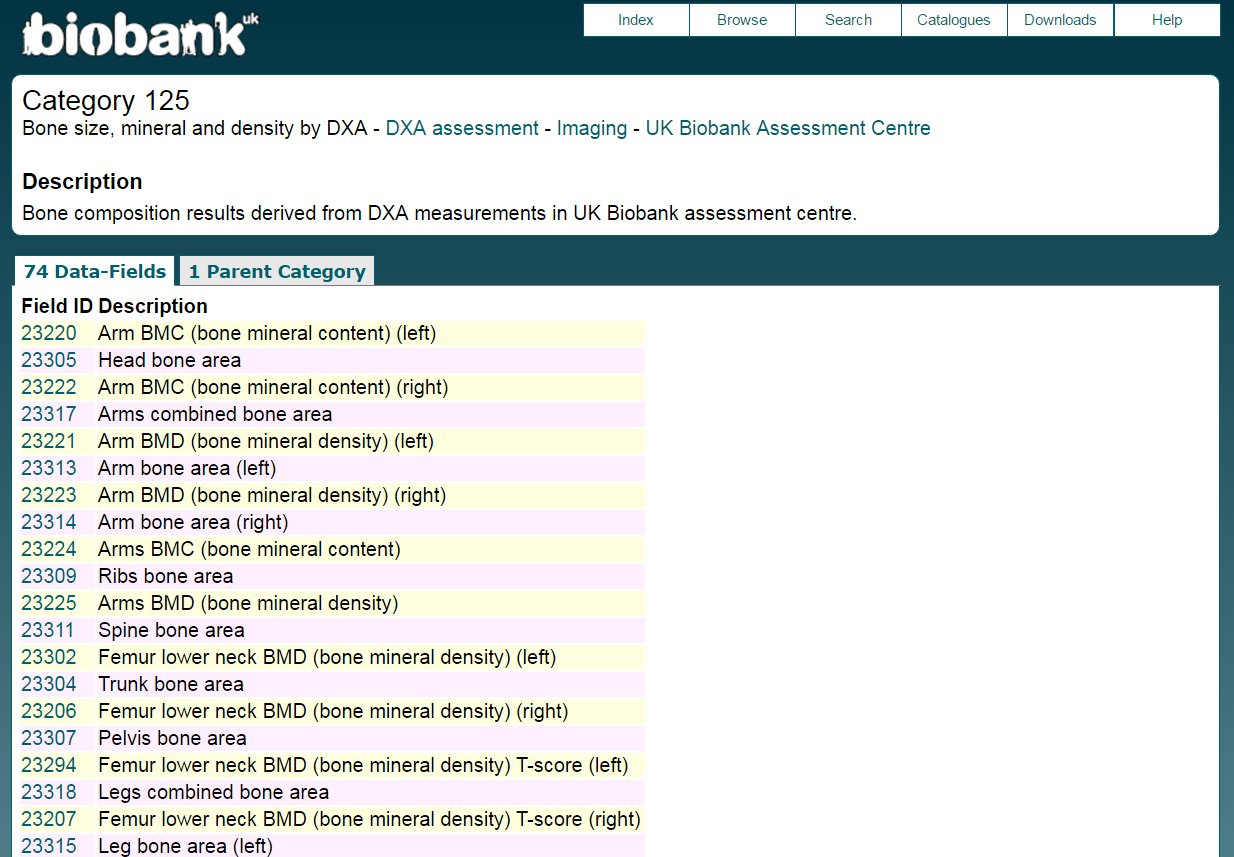

### International consortia home pages

#### Meta-Analyses of Glucose and Insulin-related traits Consortium [MAGIC](https://www.magicinvestigators.org/)


- Glycemic and metabolic traits: fasting glucose, fasting insulin, 2h glucose, HBA1c, measures of insulin secretion and sensitivity.
- Meta-analysis summary statistics genome-wide can be accessed through an FTP site.
- Users are asked to acknowledge the source of the data and cite the relevant publication.

magic1.png

_____

#### Genetic Investigation of ANthropometric Traits [GIANT](http://portals.broadinstitute.org/collaboration/giant/index.php/Main_Page)


- International collaboration studying the genetics of human body size and shape.
- Anthropometric traits include body mass index (BMI), height, waist and hip circumference, and waist-hip ratio.

giant1.png

____

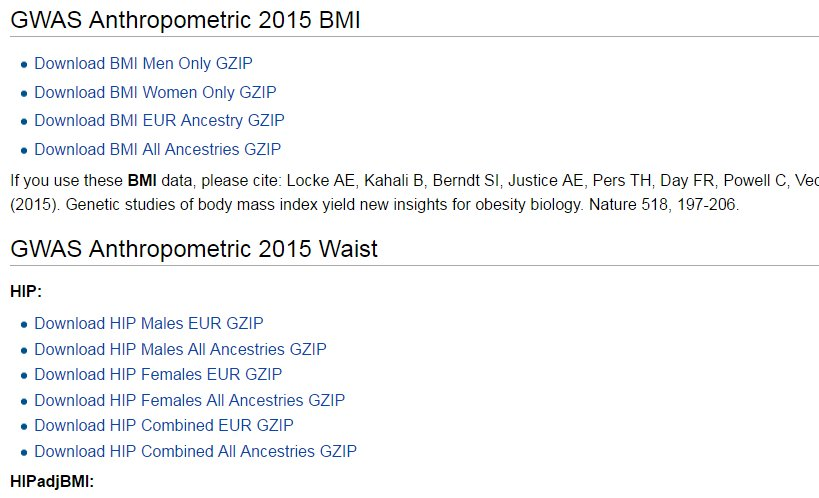


## Part 1: Replication

- We have now analysed our BMI data and wish to follow up our top signals in independent studies.
- GIANT is the largest consortium that studies anthropometric traits.    
- We are interested in European samples across both sexes.  
- We therefore download the respective summary statistics from their latest publication "Locke AE, Kahali B, Berndt SI, Justice AE, Pers TH, Day FR, Powell C, Vedantam S, Buchkovich ML, Yang J, Croteau-Chonka DC, Esko T et al. (2015). Genetic studies of body mass index yield new insights for obesity biology. Nature 518, 197-206.".


In [ ]:
# Let us set up the connection with Google Drive.
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install rpy2==3.1.0
import os # python related package to list files in the defined directory
import rpy2.ipython # allows to execute R if necessary from a python notebook
%load_ext rpy2.ipython

In [ ]:
# define home directory in python
os.chdir('/content/drive/My Drive/Complex_Traits/4_Workshop_Meta-Analysis/') 

In [ ]:
%%R 
# define home directory in R
home_dir = '/content/drive/My Drive/Complex_Traits/4_Workshop_Meta-Analysis/'
setwd(paste0(home_dir)) 

### GIANT summary statistics 


Look at the GIANT summary statistics file (GIANT_BMI_Locke_et_al_European_Ancestry_wposition.txt.gz).  
**Question**: how many variants compose this file ?

In [ ]:
#@title GIANT summary stats file
%%bash

### Let's have a look at GIANT summary statistics
zcat GIANT_BMI_Locke_et_al_European_Ancestry_wposition.txt.gz | head

###Count the number of variants in the file
zcat GIANT_BMI_Locke_et_al_European_Ancestry_wposition.txt.gz | wc -l

### Our study summary statistics 
Let's have a reminder of the form of the summary statistics file from our study (*.qassoc* file).  
**Question**: What are the different columns of the file ?


In [ ]:
#@title Our study file
%%bash

head -5 cohort1_assoc.qassoc

### Variant `rs9641123` to replicate

Find the variant `rs9641123` we wish to replicate in our dataset & GIANT. Use the `grep` command.

In [ ]:
#@title Find `rs9641123` in our study and in GIANT
%%bash
#In our study
grep -w rs9641123 cohort1_assoc.qassoc

#In GIANT
zgrep -w rs9641123 GIANT_BMI_Locke_et_al_European_Ancestry_wposition.txt.gz


**Questions**: 
- What is the position of this variant ? 
- What is the frequency of the C allele in the two studies ?

### Reformat files for `METAL` software

We want now to subset both files to keep the variant `rs9641123` we are interested in. The files should have the following columns: 
`rsID`, `CHR`, `POS`, `EA`, `NEA`, `EAF`, `beta`, `se`, `pval`, `N`.  

The following command shows how to run it on our study file.   
All the files will be saved in `part1`.

In [ ]:
%%bash

### Subset our dataset to include only `rs9641123` reformat it for METAL
#Line to save the header
echo "rsID CHR POS EA NEA EAF beta se pval N" > part1/cohort1_replication
grep -w rs9641123 cohort1_assoc.qassoc | awk 'BEGIN { FS = "\t" } ; {print $1,$2,$3,$10,$11,$12,$5,$6,$9,$4}' >> part1/cohort1_replication
cat part1/cohort1_replication


**Questions**: 
- What is the option `FS = "\t"` in `awk` ?
- Adapt the previous command line to keep only `rs9641123` from the GIANT file and put it in the `METAL` format. Save the file in `part1/GIANT_replication`

In [ ]:
#@title Subset the GIANT data
%%bash

#Header line
echo "rsID CHR POS EA NEA EAF beta se pval N" > part1/GIANT_replication
#Select the corresponding columns
zgrep -w rs9641123 GIANT_BMI_Locke_et_al_European_Ancestry_wposition.txt.gz | awk 'BEGIN { FS = "\t" } ; {print $1,$9,$10,$2,$3,$4,$5,$6,$7,$8}' >> part1/GIANT_replication
cat part1/GIANT_replication

**Questions**: 
- In which study the association test in the most significant ?
- Is the effect of the variant in the same direction between the two studies ?
- In which study the strength of association is the strongest ?

### `METAL` meta-analysis
We will now use the `METAL` software to perform the meta-analysis.

In [ ]:
%%bash
#Installation of the software
wget http://csg.sph.umich.edu/abecasis/metal/download/Linux-metal.tar.gz
tar -zxvf Linux-metal.tar.gz

In [ ]:
%%bash
## check that it installed okay
./generic-metal/metal --help
## --help also show commands that we need to define in order to run METAL

We will now run the meta-analysis using the `METAL` software. The commands below help you to make the parameter file.

In [ ]:
%%bash

## Create the METAL parameters file  

echo "
AVERAGEFREQ ON
MINMAXFREQ ON
CUSTOMVARIABLE N_total 
LABEL N_total as N
MARKER rsID
ALLELE EA NEA
FREQ EAF
EFFECT beta
SCHEME STDERR
STDERR se
PVALUE pval
USESTRAND OFF
" > part1/metal.par

ls -1 part1/*_replication | awk '{print "PROCESS " $1}' >> part1/metal.par
	
echo "
OUTFILE part1/BMI .TBL
ANALYZE HETEROGENEITY
" >> part1/metal.par

**Questions**:
- Take a look at the parameter file that we just created
- What is the signification of the following arguments:  
`SCHEME STDERR`   
`PROCESS`  
`ANALYZE HETEROGENEITY`  
If you need some help, have a look at the documentation page of the software (https://genome.sph.umich.edu/wiki/METAL_Documentation)

In [ ]:
#@title Parameters file
%%bash

## Here is the parameters file we just created
cat part1/metal.par


**Question**:
- Run the `METAL` analysis using the parameters file 

In [ ]:
#@title Run the meta-analysis
%%bash
## Now we run METAL with the parameters file (*.par)
./generic-metal/metal part1/metal.par

In [ ]:
#@title Look at the results
%%bash
cat part1/BMI1.TBL

**Questions**:

- Look at the results file (`.TBL`)
- What evidence of association is there across the two studies?
- What does ‘++’ mean in the ‘Direction’ column?  
- How much of a difference did the inclusion of our cohort did to the GIANT results? Why?
- The I^2 value is quite high. How would you explain it? What would you do next?


## Part 2: Discovery

We now wish to meta-analyze the results of our BMI study genome-wide with publically available data. We do this to boost our power for discovery.



### Subset the GIANT file
We want to subset the GIANT file to the variants presents in our study.  
`NOTE`: this is not necessary, we do it here for practicality.  
- Create a file `part2/bigfile.txt` from `GIANT_BMI_Locke_et_al_European_Ancestry_wposition.txt.gz` with the following columns:  
`SNP`, `rsID`, `A1`, `A2`, `Freq1.Hapmap`, `b`, `se`, `p`, `N`, `chr`, `po`  
Also change the chromosome `X` by `23` using `sed`.

In [ ]:
#@title Create `part2/bigfile.txt`
%%bash 
echo "SNP rsID A1 A2 Freq1.Hapmap b se p N chr pos" > part2/bigfile.txt
zcat GIANT_BMI_Locke_et_al_European_Ancestry_wposition.txt.gz | sed 's/X/23/g' | awk 'BEGIN { FS = "\t" } ; {if(NR>1){print $9":"$10,$1,$2,$3,$4,$5,$6,$7,$8,$9,$10}}' >> part2/bigfile.txt


We need to make sure that the SNP identifiers are compatbile between cohorts, which is not the case for `rs9641123`.  
- Using `sed`, replace `rs9641123` by `7:93197732` in `cohort1_assoc.qassoc` and save it to `part2/cohort1.summarystats`  
- Make a file `part2/smallfile.txt` corresponding to `part2/cohort1.summarystats` without the first line.

In [ ]:
#@title Create `part2/cohort1.summarystats` and `part2/smallfile.txt`
%%bash
### Make sure that SNP identifiers are compatible between the cohorts 
sed 's/rs9641123/7:93197732/g' cohort1_assoc.qassoc > part2/cohort1.summarystats

awk '{if(NR>1) print $1}' part2/cohort1.summarystats > part2/smallfile.txt

In [ ]:
%%bash 
#We will now use the script code/grep.pl 
#to extract the variants of our study from the GIANT file
perl code/grep.pl part2/bigfile.txt part2/smallfile.txt part2/GIANT_EUR_bothsexes
head part2/GIANT_EUR_bothsexes

**Questions**:
- How many variants were to be extracted from our study ?
- How many of these variants were present in the GIANT summary statistics ?

In [ ]:
#@title Extracted variants
%%bash
wc -l part2/smallfile.txt
wc -l part2/GIANT_EUR_bothsexes

### Prepare the meta-analysis parameters

We now want to run the meta-analysis on these variants. For that:  
- Create two files (with headers), one from `part2/GIANT_EUR_bothsexes` and one from `part2/cohort1.summarystats` with the following columns: `SNPID`, `rsID`, `CHR`, `POS`, `EA`, `NEA`, `EAF`, `beta`, `se`, `pval`, `N`.  
- Save the files to `part2/GIANT_EUR_bothsexes_reformatted` and `part2/cohort1_reformatted`

In [ ]:
#@title Create `part2/GIANT_EUR_bothsexes_reformatted` and `part2/cohort1_reformatted`
%%bash
echo "SNPID rsID CHR POS EA NEA EAF beta se pval N" > part2/GIANT_EUR_bothsexes_reformatted
awk '{print $1,$2,$10,$11,$3,$4,$5,$6,$7,$8,$9}' part2/GIANT_EUR_bothsexes >> part2/GIANT_EUR_bothsexes_reformatted
head part2/GIANT_EUR_bothsexes_reformatted

echo "SNPID CHR POS EA NEA EAF beta se pval N" > part2/cohort1_reformatted
awk 'BEGIN { FS = "\t" } ; {if(NR>1){print $1,$2,$3,$10,$11,$12,$5,$6,$9,$4}}' part2/cohort1.summarystats >> part2/cohort1_reformatted
head part2/cohort1_reformatted

To run the meta-analysis, we will use the following parameters file:

In [ ]:
%%bash
## print out the papameters for running METAL genome-wide across our 2 datasets

echo "
AVERAGEFREQ ON
MINMAXFREQ ON
# ADDFILTER INFO >= 0.4
# ADDFILTER HWE >= 0.000001
ADDFILTER EAF >= 0.01
ADDFILTER EAF <= 0.99
CUSTOMVARIABLE N_total 
LABEL N_total as N
MARKER SNPID
ALLELE EA NEA
FREQ EAF
EFFECT beta
SCHEME STDERR
STDERR se
PVALUE pval
# STRAND STRAND
USESTRAND OFF
MAXWARNINGS 100000
# SEPARATOR  WHITESPACE - default (choice: COMMA, TAB)
# ADDFILTER SNPID IN (11:105460042,11:67184725,18:25126261,19:8670147,6:19839415,7:50413917)
# GENOMICCONTROL ON
" > part2/metal.par

ls -1 part2/*_reformatted | awk '{print "PROCESS " $1}' >> part2/metal.par
	
echo "
OUTFILE part2/BMI .TBL
ANALYZE HETEROGENEITY
" >> part2/metal.par
	



In [ ]:
%%bash

cat part2/metal.par

### Run `METAL` Genome-wide
- Run `METAL` using the parameter file `part2/metal.par`

In [ ]:
#@title Run `METAL`
%%bash
./generic-metal/metal part2/metal.par


**Question**: How many variants do you have in the results file ?  

### Plotting the results
We will now prepare the results for plotting. To do so:  
- Prepare a file `part2/BMI_forplotting` from `part2/BMI1.TBL` with the following columns: `chromosome`, `position`, `pvalue`

In [ ]:
#@title Create `part2/BMI_forplotting`
%%bash

echo "chromosome position pvalue" > part2/BMI_forplotting
sed 's/:/ /g' part2/BMI1.TBL | awk '{if(NR>1)print $1,$2,$11}' >> part2/BMI_forplotting
head part2/BMI_forplotting

In [ ]:
%reload_ext rpy2.ipython

We will now draw the Manhattan plot in R (use `%%R` at the top of the cell). We will use the library `qqman`.  
- Import `part2/BMI_forplotting`
- Create a column `SNP` corresponding to `chromosome:position`
- Use the function `manhattan()` from `qqman` to draw the Manhattan plot

In [ ]:
%%R 
install.packages('qqman')

In [ ]:
#@title Manhattan plot
%%R
suppressWarnings(library(qqman))
#Import the data
input="part2/BMI_forplotting"
data <- read.table(input,stringsAsFactors=FALSE,header=TRUE)
data$SNP = paste0(data$chromosome, ":", data$position)
head(data)
### Manhattan plot
manhattan(data, chr = "chromosome", bp = "position", SNP = "SNP", p="pvalue", main = "BMI")

**Question**:
- How many variants are genome-wide significant ?

In [ ]:
#@title Number of significant signals
%%R
dim(subset(data, pvalue <= 5e-8))

We will now draw the QQ-plot of the distribution to check that there is no inflation in the test.  
- Draw the QQ-plot using the `qq()` function.
- Compute the lambda value wich is equal to `median(observed_quantiles)/median(theoretical_quantile)`.  
`NOTES`: 
    - Use the `qchisq` function to compute the quantiles with `lower = FALSE`. 
    - Numbers should be ordered in `median()`
    - Remember that the theoretical distribution has one degree of freedom.

**Questions**:
- What is the signification of `lower = FALSE` ?
- Is there an inflation in the test ?


In [ ]:
#@title QQ-plot 
%%R
##QQ-plot
qq(data$pvalue)
##lambda value
data$quantile <- qchisq(data$pvalue, 1, lower = FALSE)
data.lambda = median(sort(data$quantile))/qchisq(0.5, 1)
data.lambda

We now want to redo the QQ-plot but by removing the known BMI variants already reported. These variants are in `part2/Anthropometric_poscontrols_uk10k_GIANT_withObesity_BMIonly`

**Question**: How many variants are already reported as associated with BMI ?


In [ ]:
#@title Previously reported variants
%%bash
ls part2/
wc -l part2/Anthropometric_poscontrols_uk10k_GIANT_withObesity_BMIonly

We also want to remove the variants within 500kb of these variants.  
In R:
- Import the previously reported variants
- Remove from the meta-analysis results dataset the positions previously reported and the variants within 500kb
- Redo the QQ-plot
- Recompute the lambda value

**Question**:
What do you observe ?

In [ ]:
#@title QQ-plot after removing known BMI variants
%%R
poscons <- read.table("part2/Anthropometric_poscontrols_uk10k_GIANT_withObesity_BMIonly",header=F,as.is=T)
head(poscons)
st_rm = c()
for(i in 1:nrow(poscons)){
  st=which(data$chromosome==poscons[i,4] & data$position>=(poscons[i,5]-500000) & data$position<=(poscons[i,5]+500000))
  st_rm<-c(st,st_rm)
}
st_rm=sort(unique(st_rm))
#Remove these variants from the dataset
data_subset <- data[-st_rm,]

#QQplot
qq(data_subset$pvalue)


In [ ]:
#@title Lambda after removing known BMI variants
%%R
lambda_subset = median(sort(data_subset$quantile))/qchisq(0.5, 1)
lambda_subset

**Questions**: Look at the summary results [here](https://docs.google.com/spreadsheets/d/1GZCU3Rb-L7tSffl9A5rWPfMjJP1GjmLB13h4vMagsAA/edit?usp=sharing)

- How many signals are genome-wide significant?
- For how many signals were the results of our study nominally significant and in the same direction of effect?
- How do the results of the meta-analysis compare to the GIANT ones? Why?
- Is there evidence of heterogeneity?




All of the graphs here have been performed using the `qqman` library. The three following chunks provide you the codes to perform the graph 'by-hand'.

In [ ]:
#@title Alternative to do a 'by-hand' Manhattan plot
%%R

### Manhattan plot

input="part2/BMI_forplotting"
#out="part2/Manhattan_BMI.png"

data<-read.table(input,stringsAsFactors=FALSE,header=TRUE)
#png(out,height=600,width=800)

obspval <- as.numeric(data$pvalue)
chr <- as.numeric(data$chromosome)
pos <- as.numeric(data$position)
obsmax <- trunc(max(-log10(obspval)))+1

sort.ind <- order(chr, pos) 
chr <- chr[sort.ind]
pos <- pos[sort.ind]
obspval <- obspval[sort.ind]

x <- 1:23
x2<- 1:23

for (i in 1:23){
	curchr=which(chr==i)
	x[i] <- trunc((max(pos[curchr]))/100) +100000
	x2[i] <- trunc((min(pos[curchr]))/100) -100000
}

x[1]=x[1]-x2[1]
x2[1]=0-x2[1]

for (i in 2:24){
	x[i] <- x[i-1]-x2[i]+x[i]
	x2[i] <- x[i-1]-x2[i]
}

locX = trunc(pos/100) + x2[chr]
locY = -log10(obspval)
col1=rgb(0,0,108,maxColorValue=255)
col2=rgb(100,149,237,maxColorValue=255)
col3=rgb(0,205,102,maxColorValue=255)
col4 <- ifelse (chr%%2==0, col1, col2)
curcol <- ifelse (obspval<5e-8, col3, col4) 
plot(locX,locY,pch=20,col=curcol,axes=F,ylab="-log10 p-value",xlab="",bty="n",ylim=c(0,obsmax),cex=0.8)
axis(2,las=1)
for (i in 1:23){
	labpos = (x[i] + x2[i]) / 2
	mtext(i,1,at=labpos,cex=0.8,line=0)
}
mtext("Chromosome",1,at=x[23]/2,cex=1,line=1)
#dev.off()

In [ ]:
#@title Alternative to do a 'by-hand' QQ-plot 
%%R

### Q-Q plot

input="part2/BMI_forplotting"
#out="part2/QQ_BMI.png"

data<-read.table(input,stringsAsFactors=FALSE,header=TRUE)
#png(out,height=600,width=600)
obspval <- sort(data$pvalue)
lambda<-median(qchisq(as.numeric(obspval),1,lower=F))/qchisq(0.5,1)
logobspval <- -(log10(obspval))
exppval <- c(1:length(obspval))
logexppval <- -(log10( (exppval-0.5)/length(exppval)))
obsmax <- trunc(max(logobspval))+1
expmax <- trunc(max(logexppval))+1
plot(c(0,expmax), c(0,expmax), col="gray", lwd=1, type="l", xlab="Expected -log10 P-value", ylab="Observed -log10 P-value", xlim=c(0,expmax), ylim=c(0,obsmax), las=1, xaxs="i", yaxs="i", bty="l")
points(logexppval, logobspval, pch=23, cex=.4, bg="black")
text(1,obsmax - 10,adj = c(0,0),labels=c(paste("Lambda =",lambda)),cex=1)
#dev.off()

In [ ]:
#@title Alternative 'by-hand' when removing BMI variants
%%R

### Q-Q plot after excluding known BMI variants (and all variants within 500kb of them)

input="part2/BMI_forplotting"
#out="part2/QQ_BMI_multi.png"

data<-read.table(input,stringsAsFactors=FALSE,header=TRUE)
poscons<-read.table("part2/Anthropometric_poscontrols_uk10k_GIANT_withObesity_BMIonly",header=F,as.is=T)
dim(poscons)
poscons[1:10,]
table(poscons[,6])
st_rm<-c()
for(i in 1:nrow(poscons)){
st=which(data$chromosome==poscons[i,4] & data$position>=(poscons[i,5]-500000) & data$position<=(poscons[i,5]+500000))
st_rm<-c(st,st_rm)
}

st_rm=sort(unique(st_rm))
pvalues_all<-data$pvalue
pvalues_novel<-data$pvalue[-st_rm]

name<-c("All markers", "Excluding known loci")
color<-c("black", "blue")
zoomed<-0 # indicates if you want to zoom into the QQplot

### SNP set 1  ##
num.snps <- length(na.omit(pvalues_all)) 
expected1<-c(1:num.snps)/(num.snps + 1)
lambda<-round(median(qchisq(as.numeric(pvalues_all),1,lower=F))/qchisq(0.5,1), digits=4)

### Expected values and limits  ###
expected1.b<-xmax<- -1*log10(sort(expected1))
pvals1.b<-ymax<- -1*log10(sort(as.numeric(pvalues_all)))
leg_name_out<-c(paste(name[1], " (n=", num.snps, ")", sep=""), paste("     lambda = ", lambda, sep=""))

# novel
num.snps <- length(na.omit(pvalues_novel)) 
expected<-c(1:num.snps)/(num.snps + 1)
expected.b<- -1*log10(sort(expected))
pvals.b<- -1*log10(sort(as.numeric(pvalues_novel)))
xmax<-max(xmax, expected.b)
ymax<-max(ymax, pvals.b)

if(zoomed==1){
	xlimit<-c(xmax+.5) 
	ylimit<-c(4)
}

if(zoomed==0){
	xlimit<-c(xmax+.5)
	ylimit<-c(ymax+.5)
} 

#png(out,height=600,width=600)
plot(expected1.b, pvals1.b,xlim=c(-.3,xlimit),ylim=c(0,ylimit),col=color[1],type="p", pch=".", cex=3,xlab="Expected -log10(p)", ylab="Observed -log10(p)",cex.lab=1.5) 

# novel
num.snps <- length(na.omit(pvalues_novel)) 
expected<-c(1:num.snps)/(num.snps + 1)
expected.b<- -1*log10(sort(expected))
pvals.b<- -1*log10(sort(as.numeric(pvalues_novel)))
lambda<-round(median(qchisq(as.numeric(pvalues_novel),1,lower=F))/qchisq(0.5,1), digits=4)
points(expected.b, pvals.b,col=color[2],type="p", pch=".", cex=3)  
abline(0,1,col="black")  
leg_name<-c(paste(name[2], " (n=", num.snps, ")", sep=""), paste("     lambda = ", lambda, sep=""))
leg_name_out<-c(leg_name_out, leg_name)

legend("topleft", leg_name_out,text.col=rep(color, each=2), bty="n", cex=1.1, inset=-0.01) 
#dev.off()